#Analyze potential pulsars

In [1]:
%matplotlib inline
import mpld3
from mpld3 import plugins
mpld3.enable_notebook()
from uw.like2.analyze.analysis_base import FloatFormat
from uw.like2.analyze import _html; reload(_html)
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_6years/uw970'))
from uw.like2.analyze import (pulsars,  sourceinfo, ); 
map(reload, (pulsars, sourceinfo,));
self = pulsars.PulsarSearch()
df=self.df
glon = df.glon
glon[glon>180]-=360
df['unid'] = [x is None for x in df.associations]
df['association'] = ['' if x is None else x['cat'][0]+':'+x['name'][0] for x in self.df.associations]
df['id-cat'] = ['' if x is None else x['cat'][0] for x in self.df.associations]
df['id-name'] = ['' if x is None else x['name'][0] for x in self.df.associations]

loading sources.pickle


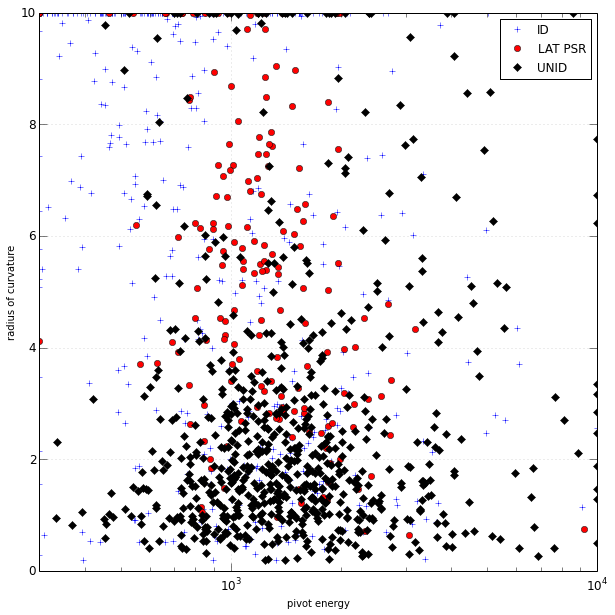

In [2]:
fig,ax = plt.subplots(figsize=(10,10))
cut = (df.ts>10)& (df.curvature>0.02) #& (df.ts<100)
psr = cut & self.psr
unid = cut & df.unid & ~self.psr
ided = cut & ~df.unid & ~self.psr
df['radcurv']=1./df.curvature
ax.plot(df.pivot_energy[ided].clip(300,1e4),df.radcurv[ided].clip(None,10), '+', label='ID');
ax.plot(df.pivot_energy[psr].clip(300,1e4),df.radcurv[psr].clip(None,10), 'o', color='red', label='LAT PSR');
ax.plot(df.pivot_energy[unid].clip(300,1e4),df.radcurv[unid].clip(None,10), 'D', color='k', label='UNID');
plt.setp(ax, xscale='log', xlabel='pivot energy', ylabel='radius of curvature', ylim=(0.,10), xlim=(300,1e4));
ax.grid(True, alpha=0.3); ax.legend();

###Duplicate Fig 1

In [4]:
def make_d3_tooltips(df, selection=None):
    """Make an array of labels for d3 tooltips
    df : a DataFrame with the columns to display in the tooltip
    selection : optional subset
    """
    labels = []
    dfs = df if selection is None else df[selection]
    for name in dfs.index:
        label = df.ix[[name],:].T
        labels.append(str(label.to_html(float_format=FloatFormat(2))))
    return labels


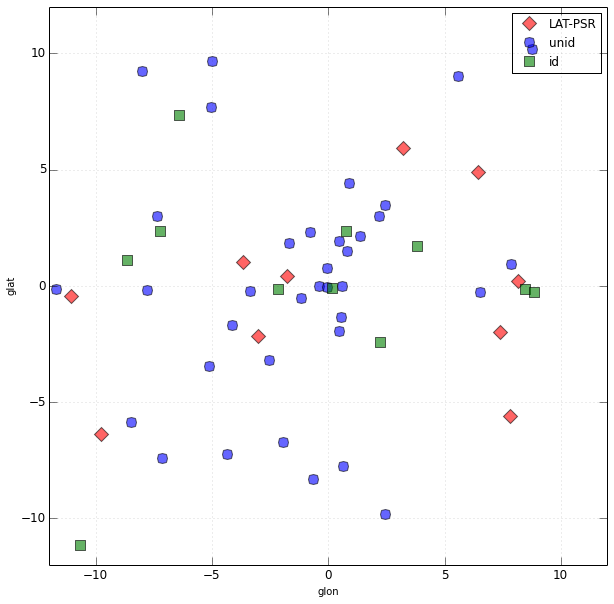

In [8]:
fig,ax = plt.subplots(figsize=(10,10))
cuts = (df.ts>10) & (df.pivot_energy>400) & (df.pivot_energy<2000) & (df.curvature>0.1) & (df.curvature<1.0)
 
#dfs = df[cuts & psr]['glat glon ts association'.split()]

plot_args=dict(ms=10, mew=1,alpha=0.6)
pointslist=[
    ax.plot(df.glon[cuts & psr],  df.glat[cuts & psr],  'D', color='red', label='LAT-PSR', **plot_args),
    ax.plot(df.glon[cuts & unid], df.glat[cuts & unid], 'o', label='unid', **plot_args ),
    ax.plot(df.glon[cuts & ided], df.glat[cuts & ided], 's', label='id',  **plot_args),
    ]
plt.setp(ax, xlim=(-12,12), xlabel='glon', ylim=(-12,12), ylabel='glat');
ax.legend()
ax.grid(True, alpha=0.3)

labels=[
    make_d3_tooltips(df[cuts & psr]['glat glon ts pivot_energy radcurv'.split()]),
    make_d3_tooltips(df[cuts & unid]['glat glon ts pivot_energy radcurv '.split()]),
    make_d3_tooltips(df[cuts & ided]['glat glon ts pivot_energy radcurv id-cat id-name'.split()]),
    ]
tooltip_args=dict(voffset=20, hoffset=10, css=_html.tooltips_css)
tooltips=[ plugins.PointHTMLTooltip(point[0], label, **tooltip_args) for point,label in zip(pointslist, labels)]

plugins.connect(fig, *tooltips)

Now make a d3 version with tooltips

wrote 429 sources to pulsar_candidates.csv
wrote file plots/pulsars/candidates.htm


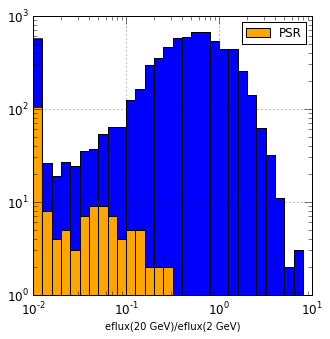

In [191]:
self.efratio();
self.selection()

In [194]:
t = self.df[self.keep & (self.df.eflux_ratio<0.2) & (self.df.ts<100)]; len(t)

302

In [221]:
tsl=[]; tsm=[]; tsh=[]
for i in range(len(self.df.index)):
    tsa=df.ix[i].sedrec['ts']
    tsl.append(sum(tsa[:4]))
    tsm.append(sum(tsa[4:8]))
    tsh.append(sum(tsa[8:]))

In [222]:
self.df['ts_low']=tsl
self.df['ts_med']=tsm
self.df['ts_high']=tsh

##Check current pulsars

In [5]:
psf=self.psr; df = self.df
select = (self.psr) & (df.ts_low<5) & (df.ts_high<2) #& (df.ts<50); 
df.ix[select]['ts ts_low ts_med ts_high'.split()]

,ts,ts_low,ts_med,ts_high
name,,,,
PSR J0737-3039A,9.693089,0.000000,10.116810,1.255540
PSR J0908-4913,11.85654,0.000000,21.773000,0.000000
PSR J0931-1902,76.81076,0.000000,72.844379,0.000000
PSR J1137+7528,36.0279,4.373505,33.831577,0.000000
PSR J1224-6407,13.74239,0.000000,12.789517,0.000000
PSR J1455-3330,23.67688,4.011526,19.780890,0.000000
PSR J1640+2224,41.44118,0.000000,41.870637,0.000000
PSR J1730-3350,0.2638685,2.293672,6.093222,0.000000
PSR J1744-7619,6.45523e-08,1.363889,1.128669,0.000000


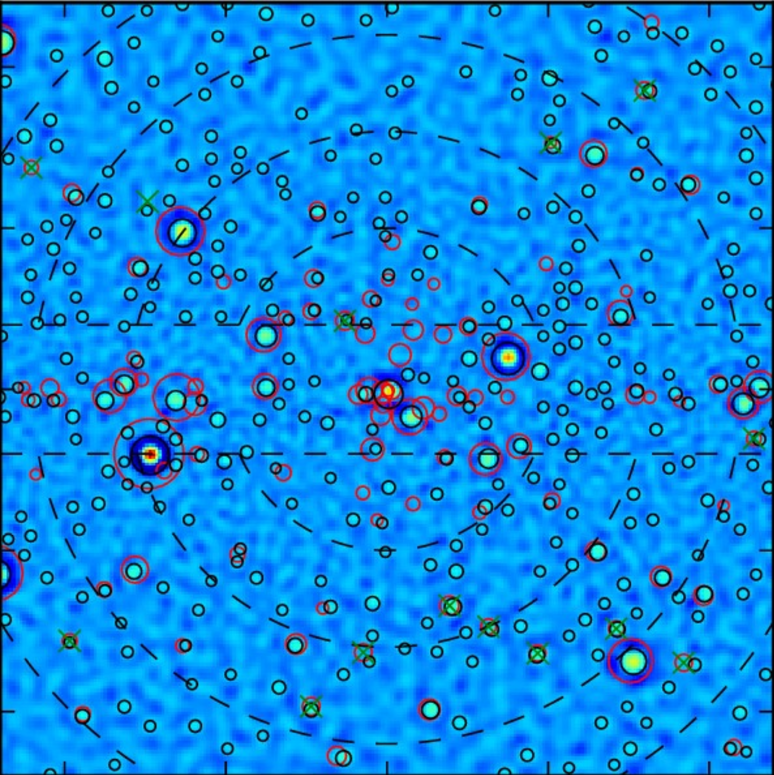

In [29]:
from IPython.display import Image
Image(filename='/nfs/farm/g/glast/u/burnett/weniger_fig1.png') 

In [6]:
!pwd

/nfs/farm/g/glast/g/catalog/pointlike/skymodels/P301_6years/uw970
